<a href="https://colab.research.google.com/github/ziedjouini/clustering/blob/main/3_1_ML_Clustering_K_means_M_K_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***1- improt first  all my needed modules***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

***2 - Dans scikit-learn, importe le dataset Iris, c'est un grand classique de la data. Il contient 3 espèces de fleurs (des iris) suivant leur longueur et largeur de pétale et de sépale.***

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

In [ ]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


***3 - Entraîne ton modèle pour qu’il trouve 3 clusters à partir des 4 colonnes numériques.***

In [ ]:
X = data.select_dtypes(include='number')
y = data['species']

In [ ]:
kmean_model = KMeans()
kmean_model.fit(X)

pd.DataFrame(kmean_model.cluster_centers_)


,0,1,2,3
0,6.430000,2.940000,4.590000,1.435000
1,5.242857,3.667857,1.500000,0.282143
2,7.475000,3.125000,6.300000,2.050000
3,6.568182,3.086364,5.536364,2.163636
4,5.242857,2.371429,3.442857,1.028571
5,5.628571,2.723810,4.133333,1.295238
6,4.704545,3.122727,1.413636,0.200000
7,6.027778,2.733333,5.027778,1.794444


In [ ]:
print('the inertia of the model is : ' , kmean_model.inertia_)

the inertia of the model is :  29.99042640692641


In [ ]:
pd.DataFrame(kmean_model.labels_)

,0
0,1
1,6
2,6
3,6
4,1
...,...
145,3
146,7
147,3
148,3


In [ ]:
print('we have ', len(np.unique(kmean_model.labels_)) , 'clusters criteria')

we have  8 clusters


***4- get the cluster numbers more optimal ***

In [ ]:
inertia_tab = []
silhouette_tab = []
for i in range(2,10):
  kmean_model_2 = KMeans(n_clusters=i,init = 'k-means++', random_state=5)
  pred = kmean_model_2.fit_predict(X)
  inertia_tab.append(kmean_model_2.inertia_)
  silhouette_tab.append(silhouette_score(X, kmean_model_2.labels_))


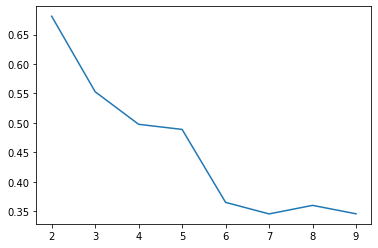

In [ ]:
plt.plot(range(2,10), silhouette_tab)

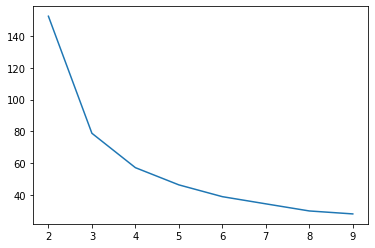

In [ ]:
plt.plot(range(2,10),inertia_tab)

not so easy to tell , if the optimal number is 5 or 3 !!!

In [ ]:
# try with 5 cluster
kmeans_model_5 = KMeans(n_clusters=5, random_state=5)
kmeans_model_5.fit(X)
kmeans_model_5.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 4, 4, 0, 4, 4, 4, 0, 4, 0, 0, 4, 0, 4, 0, 4,
       4, 0, 4, 0, 4, 0, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 4, 0, 4, 4, 4,
       0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 2, 4, 3, 2, 2, 3, 0, 3, 2, 3,
       2, 2, 2, 4, 2, 2, 2, 3, 3, 4, 2, 4, 3, 4, 2, 3, 4, 4, 2, 3, 3, 3,
       2, 4, 4, 3, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4], dtype=int32)



---



---



---



---



---



In [ ]:
# scale our data
# but don't work ,  the graph draw the marker='X'  outside the scatterplot
scaler  = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [ ]:
# try with 3 cluster  without standardisation
kmeans_model_3 = KMeans(n_clusters=3, random_state=5)
prediction_by_3_clusters = kmeans_model_3.fit_predict(X)
kmeans_model_3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
print('score for no scaled X: ', kmeans_model_3.score(X))

score for no scaled X:  -78.85144142614601


In [ ]:
# get the cluster centers
centers  = kmeans_model_3.cluster_centers_
centers

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])



---



In [ ]:
# try with 3 cluster  with standardisation
kmeans_model_3_scaled = KMeans(n_clusters=3, random_state=5)
prediction_by_3_clusters_scaled = kmeans_model_3_scaled.fit_predict(X_scaled)
kmeans_model_3_scaled.labels_

In [ ]:
print('score for scaled X:', kmeans_model_3_scaled.score(X_scaled))

score for scaled X: -139.8204963597497


In [ ]:
# get the cluster centers
centers_scaled  = kmeans_model_3_scaled.cluster_centers_
centers_scaled

array([[ 1.13597027,  0.08842168,  0.99615451,  1.01752612],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [-0.05021989, -0.88337647,  0.34773781,  0.2815273 ]])

In [ ]:
centers_inversed = scaler.inverse_transform(kmeans_model_3_scaled.cluster_centers_)
centers_inversed

array([[6.78085106, 3.09574468, 5.5106383 , 1.97234043],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.80188679, 2.67358491, 4.36981132, 1.41320755]])

In [ ]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)



---



In [ ]:
# compare the prediction of scaled and no scaled data
species_factorized = data['species'].factorize()[0]
result_df = pd.DataFrame({'original_data' : data['species'],
              'original_species_factorized' :species_factorized,
              'prediction_without_scale' : prediction_by_3_clusters,
              'prediction_whith_scale' : prediction_by_3_clusters_scaled})
result_df

,original_data,original_species_factorized,prediction_without_scale,prediction_whith_scale
0,setosa,0,1,1
1,setosa,0,1,1
2,setosa,0,1,1
3,setosa,0,1,1
4,setosa,0,1,1
...,...,...,...,...
145,virginica,2,2,0
146,virginica,2,0,2
147,virginica,2,2,0
148,virginica,2,2,0


In [ ]:
result_df['first_comparaison_without_scale'] = result_df.apply(lambda x: (True if x[1] == x[2]  else False ) ,   axis=1)
result_df['second_comparaison_scale'] = result_df.apply(lambda x: (True if x[1] == x[2]  else False ) ,   axis=1)

In [ ]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
result_df.loc[result_df['first_comparaison_without_scale'] == False].shape

(114, 6)

In [ ]:
result_df.loc[result_df['second_comparaison_scale'] == False].shape

(114, 6)

In [ ]:
result_df.loc[result_df['second_comparaison_scale'] == False].iloc[35:65, :]

,original_data,original_species_factorized,prediction_without_scale,prediction_whith_scale,first_comparaison_without_scale,second_comparaison_scale
35,setosa,0,1,1,False,False
36,setosa,0,1,1,False,False
37,setosa,0,1,1,False,False
38,setosa,0,1,1,False,False
39,setosa,0,1,1,False,False
40,setosa,0,1,1,False,False
41,setosa,0,1,1,False,False
42,setosa,0,1,1,False,False
43,setosa,0,1,1,False,False
44,setosa,0,1,1,False,False




---



---



---



---



---



***5- Produis une visualisation comparant le dataset de base avec les classes générées par le K-means en t’inspirant de cette image. Tu peux prendre 2 dimensions de ton choix parmi les 4***

In [ ]:
# add the prediction into the dataframe
data['prediction_3_clusters'] = prediction_by_3_clusters

In [ ]:
data

,sepal_length,sepal_width,petal_length,petal_width,species,prediction_3_clusters
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


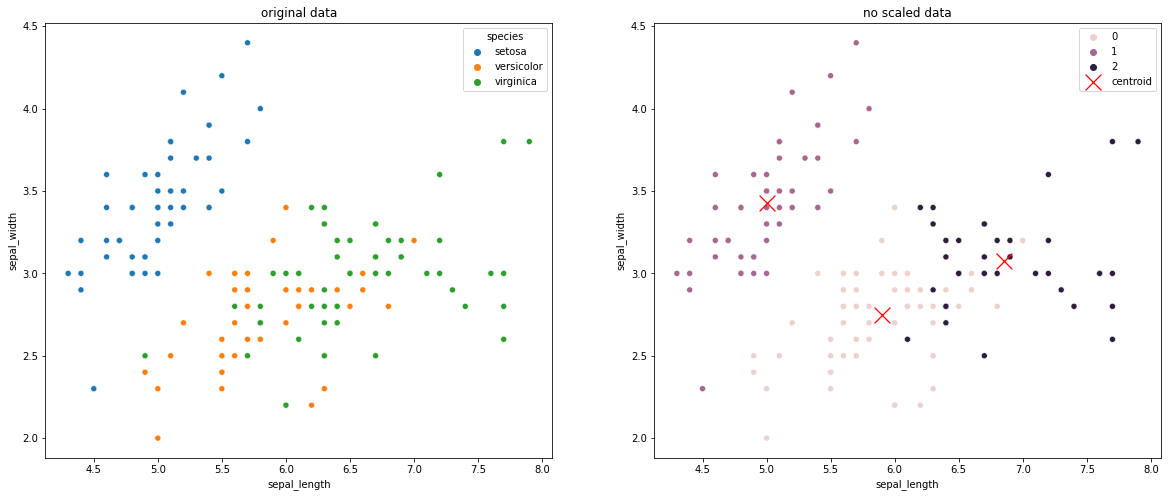

In [ ]:
fig , ax  = plt.subplots(1,2,  figsize=(20,8))

my_scatter_one = sns
my_scatter_one.scatterplot(ax=ax[0], x= X['sepal_length'] , y= X['sepal_width'] , hue= data['species'])
ax[0].set_title('original data')


my_scatter_two = sns
my_scatter_two.scatterplot(ax=ax[1], x= X['sepal_length'] , y= X['sepal_width'] , hue=data['prediction_3_clusters'])
ax[1].set_title('no scaled data')

my_scatter_two.scatterplot(centers[:,0], centers[:,1 ], marker="x", color='r',s=250, label='centroid');

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


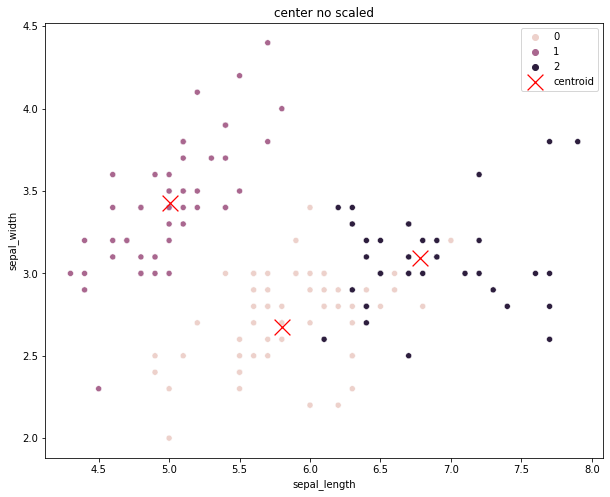

In [ ]:
fig , ax  = plt.subplots(figsize=(10,8))
my_scatter_inverse_scale = sns
my_scatter_inverse_scale.scatterplot(x= X['sepal_length'] , y= X['sepal_width'] , hue= data['prediction_3_clusters'])
ax.set_title('centers_inversed from scaled')
my_scatter_inverse_scale.scatterplot(centers_inversed[:,0], centers_inversed[:,1 ], marker="x", color='r',s=250, label='centroid');

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


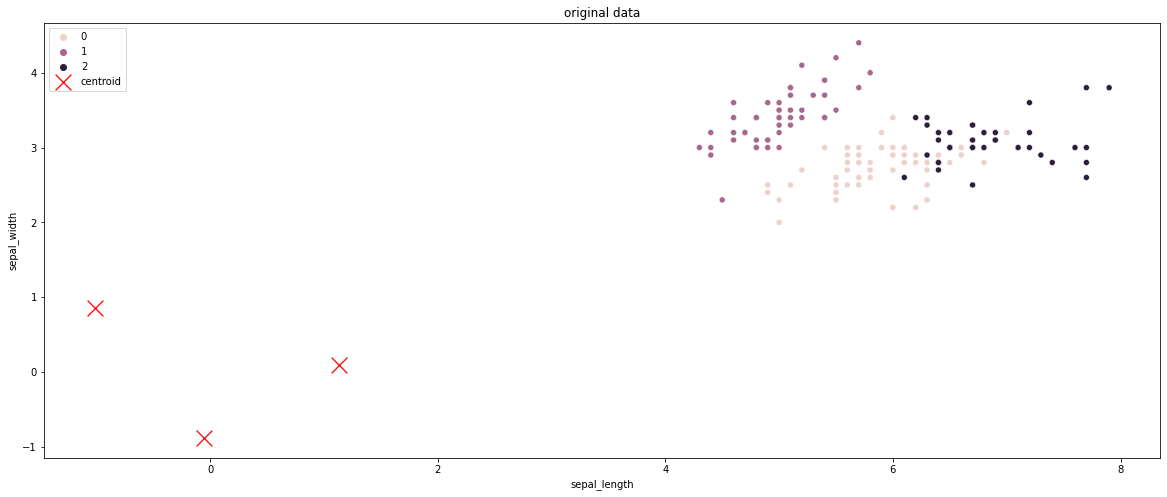

In [ ]:
fig , ax  = plt.subplots(figsize=(20,8))
my_scatter_with_scale = sns
my_scatter_with_scale.scatterplot(x= X['sepal_length'] , y= X['sepal_width'] , hue=data['prediction_3_clusters'])
ax.set_title('centers_scaled data')

my_scatter_with_scale.scatterplot(centers_scaled[:,0], centers_scaled[:,1 ], marker="x", color='r',s=250, label='centroid');

***6 - Entraine un autre modèle sur 2 clusters, puis affiche les mêmes graphiques***

In [ ]:
# train the model on 2 clusters
kmeans_model_2_clusters = KMeans(n_clusters=2)
prediction_2_clusters = kmeans_model_2_clusters.fit_predict(X)
data['prediction_2_clusters'] = prediction_2_clusters

In [ ]:
# get the labels
kmeans_model_2_clusters.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
# get the centers
centers_2_clusters = kmeans_model_2_clusters.cluster_centers_

In [ ]:
centers_2_clusters

array([[6.30103093, 2.88659794, 4.95876289, 1.69587629],
       [5.00566038, 3.36981132, 1.56037736, 0.29056604]])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


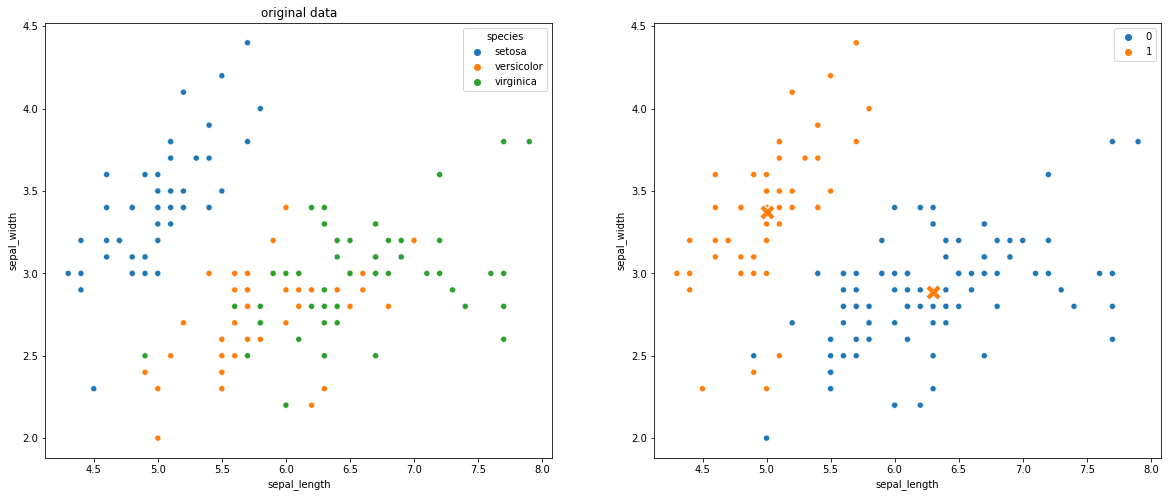

In [ ]:
# draw graphs
fig , ax  = plt.subplots(1,2,  figsize=(20,8))

my_scatter_one = sns
my_scatter_one.scatterplot(ax=ax[0], x= data['sepal_length'] , y= data['sepal_width'] , hue= data['species'])
ax[0].set_title('original data')


my_scatter_two = sns
my_scatter_two.scatterplot(ax=ax[1], x= data['sepal_length'] , y= data['sepal_width'] , hue=data['prediction_2_clusters'])
ax[0].set_title('original data')

my_scatter_two.scatterplot(centers_2_clusters[:, 0], centers_2_clusters[:, 1], marker='X', s=250);


***7- Idem pour 4 clusters***

In [ ]:
# train the model on 4 clusters
kmeans_model_4_clusters = KMeans(n_clusters=4)
prediction_4_clusters = kmeans_model_4_clusters.fit_predict(X)
data['prediction_4_clusters'] = prediction_4_clusters

In [ ]:
# get the labels
kmeans_model_4_clusters.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 1, 3, 1,
       1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 1,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 2, 1, 2, 2, 2, 2, 3, 2, 2, 2,
       1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1], dtype=int32)

In [ ]:
# get the centers
centers_4_clusters = kmeans_model_4_clusters.cluster_centers_

In [ ]:
centers_4_clusters

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.23658537, 2.85853659, 4.80731707, 1.62195122],
       [6.9125    , 3.1       , 5.846875  , 2.13125   ],
       [5.52962963, 2.62222222, 3.94074074, 1.21851852]])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


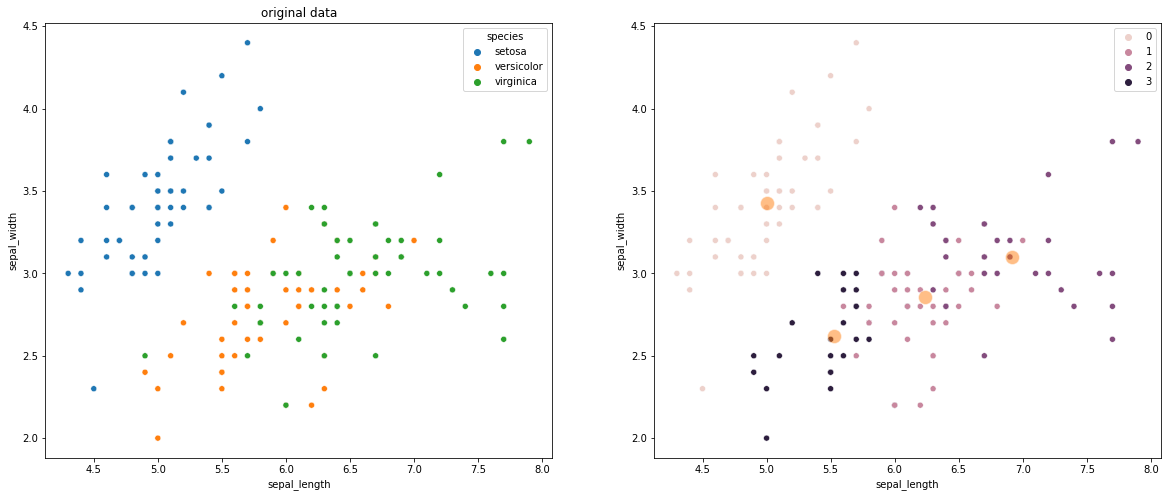

In [ ]:
# draw graphs
fig , ax  = plt.subplots(1,2,  figsize=(20,8))

my_scatter_one = sns
my_scatter_one.scatterplot(ax=ax[0], x= data['sepal_length'] , y= data['sepal_width'] , hue= data['species'])
ax[0].set_title('original data')


my_scatter_two = sns
my_scatter_two.scatterplot(ax=ax[1], x= data['sepal_length'] , y= data['sepal_width'] , hue=data['prediction_4_clusters'])
ax[0].set_title('original data')

my_scatter_two.scatterplot(centers_4_clusters[:, 0], centers_4_clusters[:, 1], markers='stars' , s=200, alpha=0.5);


***8 - Évalue ton modèle en utilisant la méthode Elbow, entre 2 et 10 clusters, quel nombre cluster semble optimal ?***

In [ ]:
elbow_df = pd.DataFrame()
inertia_tab=[]
for i in range(2,10):
  kmean_elbow_model = KMeans(n_clusters=i)
  kmean_elbow_pred = kmean_elbow_model.fit_predict(X)
  elbow_df = pd.concat([elbow_df,pd.DataFrame(kmean_elbow_model.labels_).T], ignore_index=True)
  inertia_tab.append(kmean_elbow_model.inertia_)
elbow_df

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,2,2,0,2,2,2,0,2,2,0
2,3,3,3,3,3,3,3,3,3,3,...,1,1,2,1,1,1,2,2,1,2
3,1,1,1,1,1,1,1,1,1,1,...,3,3,0,3,3,3,0,3,3,0
4,0,0,0,0,0,4,0,0,0,0,...,2,2,1,2,2,2,1,2,2,1
5,1,3,3,3,1,1,3,1,3,3,...,0,0,6,0,0,0,6,0,0,6
6,1,7,7,7,1,1,7,1,7,7,...,4,4,0,4,4,4,0,4,4,0
7,0,8,8,8,0,5,8,0,8,8,...,3,3,1,3,3,3,1,3,3,1


3 seems to be the optimal numbers of cluster
but  if it's to me  to predict what the number of clusters, i would have said 5



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


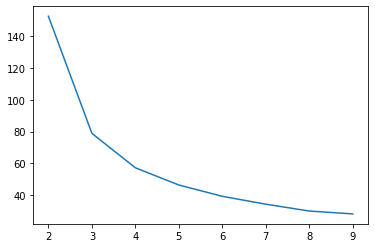

In [ ]:
elbow_plot =sns
elbow_plot.lineplot(range(2,10), inertia_tab)
print('3 seems to be the optimal numbers of cluster')
print('but  if it\'s to me  to predict what the number of clusters, i would have said 5')
print()


***9- Évalue ton modèle en utilisant la méthode Silhouette, entre 2 et 10 clusters, quel nombre de clusters semble optimal ? Et toi, visuellement, si tu ne savais pas qu'il y avait 3 espèces, tu en aurais trouvé combien ?***

3 seems to be the optimal numbers of cluster
but  if it's to me  to predict what the number of clusters, i would have said 5



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


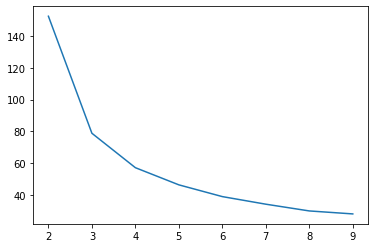

In [ ]:

silhouette_tab=[]
for i in range(2,10):
  kmean_elbow_model = KMeans(n_clusters=i)
  kmean_elbow_pred = kmean_elbow_model.fit_predict(X)
  silhouette_tab.append(kmean_elbow_model.inertia_)


elbow_plot =sns
elbow_plot.lineplot(range(2,10), silhouette_tab)
print('3 seems to be the optimal numbers of cluster')
print('but  if it\'s to me  to predict what the number of clusters, i would have said 5')
print()
